Parametri del fit:
a = -24.453381752868705 +/- 6.476765310718514
b = 3.498361706210427 +/- 0.40180785550221
c = 0.9805165037334783 +/- 0.004799190186357945
Chi-quadro ridotto = 0.7363102984663304


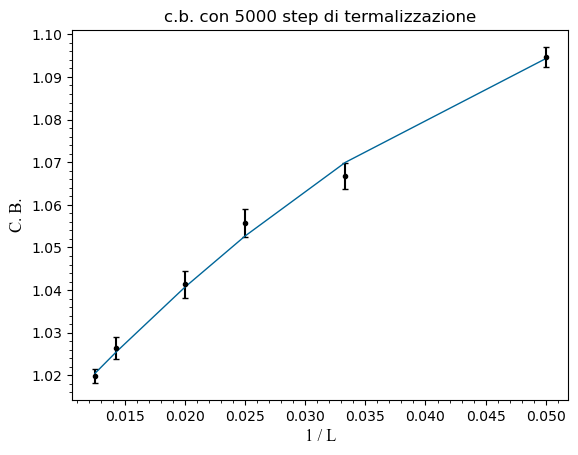

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definisci la funzione di fit
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

# Apri il file
with open('/Users/monicacesario/Desktop/modulo1/Binder_045_new.txt', 'r') as file:
    # Leggi le colonne
    data = []
    for line in file:
        values = line.split()
        if len(values) >= 3:
            data.append([float(values[0]), float(values[1]), float(values[2])])

# Verifica se sono presenti dati sufficienti
if len(data) < 3:
    print("Errore: Non ci sono abbastanza dati nel file.")
    exit()

# Estrai le colonne
x = np.array([1 / row[0] for row in data])
y = np.array([row[1] for row in data])
errors = np.array([row[2] for row in data])

# Esegui il fit
params, cov = curve_fit(quadratic_function, x, y, sigma=errors)

# Estrai i parametri e i relativi errori
a, b, c = params
a_err, b_err, c_err = np.sqrt(np.diag(cov))

# Calcola il chi-quadro ridotto
residuals = y - quadratic_function(x, a, b, c)
chi_squared = np.sum((residuals / errors)**2)
dof = len(x) - 3  # Gradi di libertà: numero dei dati meno numero dei parametri del fit
chi_squared_red = chi_squared / dof

# Impostazione font
font1 = {'family': 'Times New Roman', 'size': 15}
font2 = {'family': 'Times New Roman', 'size': 12}

# Stampa a schermo i parametri con gli errori e il chi-quadro ridotto
print(f'Parametri del fit:')
print(f'a = {a} +/- {a_err}')
print(f'b = {b} +/- {b_err}')
print(f'c = {c} +/- {c_err}')
print(f'Chi-quadro ridotto = {chi_squared_red}')

# Crea il grafico dei dati e del fit
plt.errorbar(x, y, yerr=errors, fmt='.', capsize=2, color='black')
plt.plot(x, quadratic_function(x, a, b, c), linewidth=1, color='#006699')
plt.title('c.b. con 5000 step di termalizzazione')
plt.xlabel('1 / L', fontdict=font2)
plt.ylabel('C. B.', fontdict=font2)

# Imposta le tacchette minori sugli assi
plt.minorticks_on()

# Mostra il grafico
plt.show()
